In [3]:
import sklearn as sk

In [15]:
import numpy as np

In [32]:
import matplotlib.pyplot as mplot
import seaborn as sns

In [ ]:
#ML workflow to demonstrate how to construct, check and compare ML models
#

In [ ]:
##Use the diabete data in scikit-learn, and then showcase the following:
##(1) data exploration
##(2) Model building using scikit-learn
##(3) Using Keras and Tensorflow
##(4) Using autoML

In [ ]:
##########Part 1: data exploration
###########################################

In [4]:
from sklearn.datasets import load_diabetes

In [6]:
diabete_data = load_diabetes()

In [9]:
len(diabete_data.target)

442

In [20]:
diabete_data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [16]:
np.shape(diabete_data.data)

(442, 10)

In [17]:
#del diabete_date #delete the type

In [18]:
diabete_data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [29]:
len(diabete_data.data[:,1])

442

(array([235.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 207.]),
 array([-0.04464164, -0.03510946, -0.02557729, -0.01604511, -0.00651293,
         0.00301924,  0.01255142,  0.02208359,  0.03161577,  0.04114794,
         0.05068012]),
 <BarContainer object of 10 artists>)

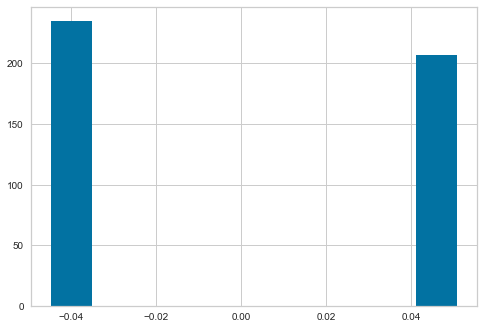

In [31]:
mplot.hist(diabete_data.data[:,1])

In [33]:
import seaborn as sns
#sns.set_theme(style="ticks")

In [35]:
import pandas as pd

In [45]:
df_diabete = pd.DataFrame(diabete_data.data)

In [46]:
df_diabete.columns=['age','sex','bmi','map','tc','ldl','hdl','tch','ltg','glu']

In [41]:
df_diabete["target"]=diabete_data.target

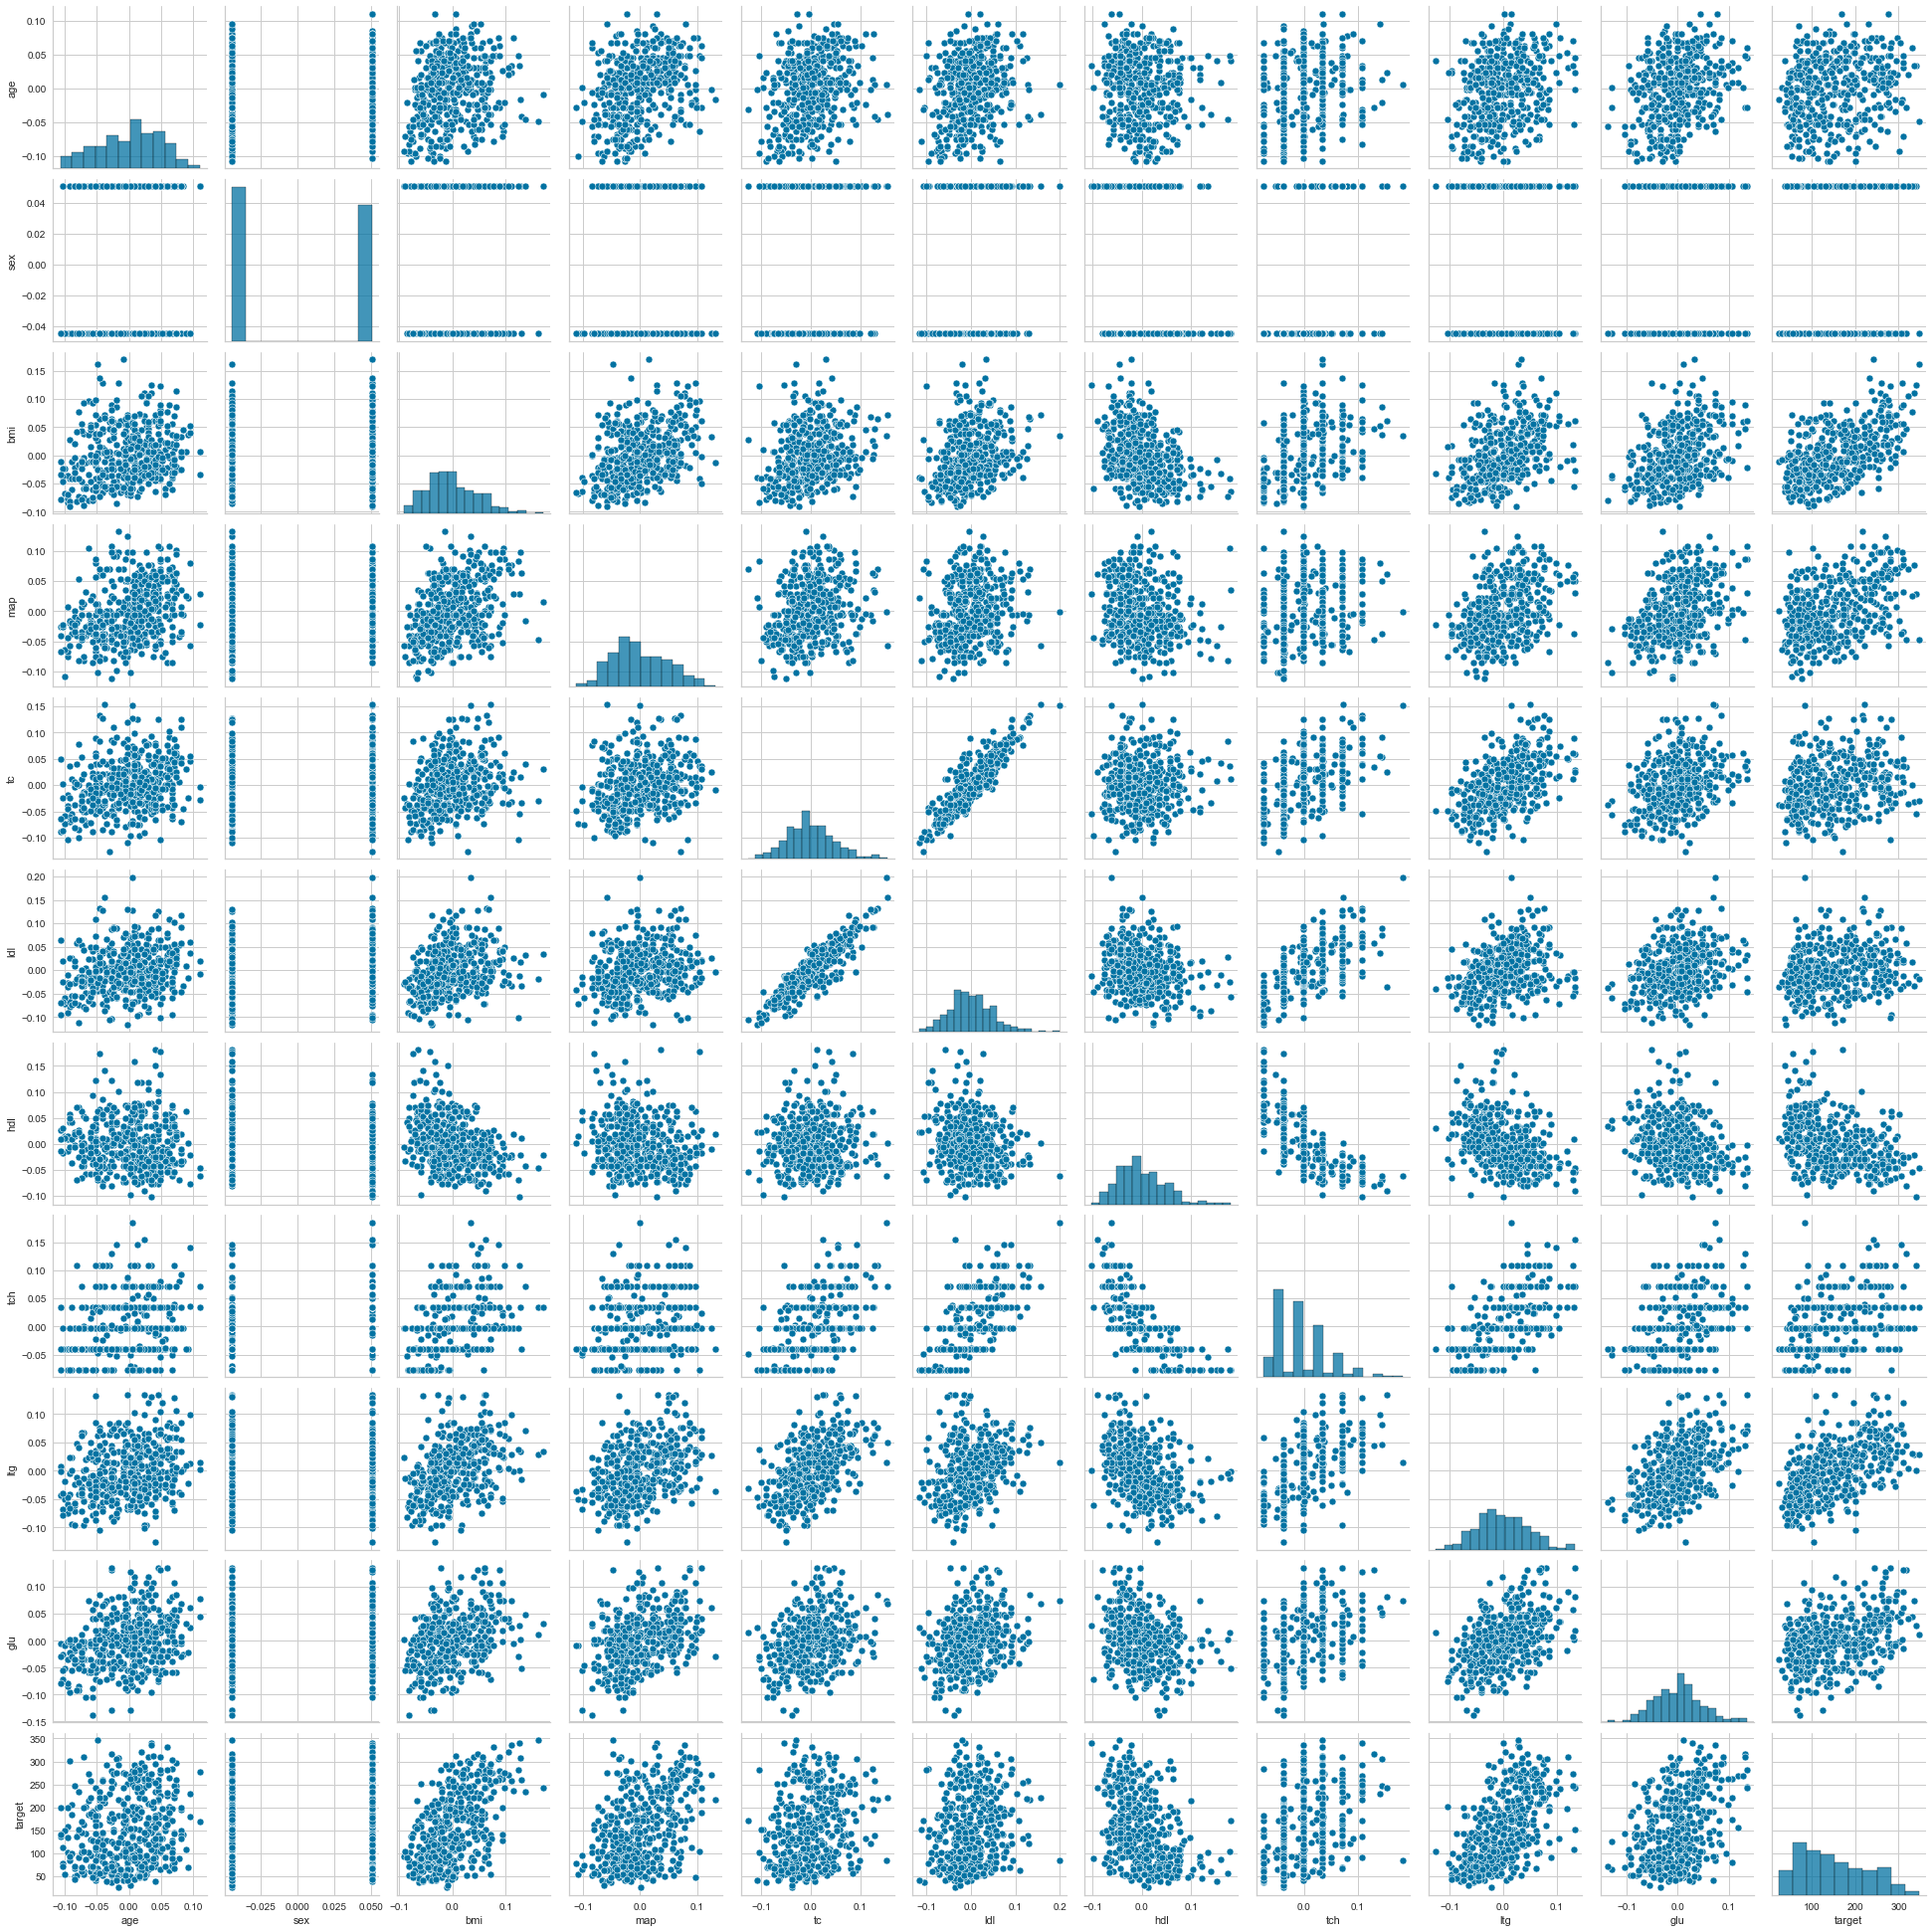

In [44]:
sns.pairplot(df_diabete)

In [19]:
diabete_data.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

In [21]:
#age sex bmi map tc ldl hdl tch ltg glu 

In [22]:
#The target is a quantitative measure of disease progression one year after baseline

In [23]:
#check the features:
from yellowbrick.target import FeatureCorrelation

In [47]:
predictor_names=['age','sex','bmi','map','tc','ldl','hdl','tch','ltg','glu']
discrete_predictors = [False for i in range(len(predictor_names))]   #as you can see from the scatter matrix plot, sex is discrete
discrete_predictors[1] = True  #sex

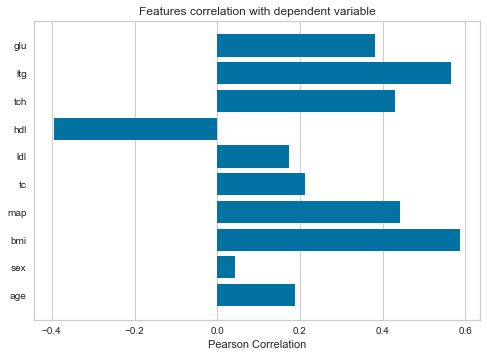

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [50]:
#pearson correlation
yb_visualizer = FeatureCorrelation(labels=predictor_names)
yb_visualizer.fit(diabete_data.data, diabete_data.target)        # Fit the data to the visualizer
yb_visualizer.show()           # visualize the pearson correlation between predictors and dependent variable (target)

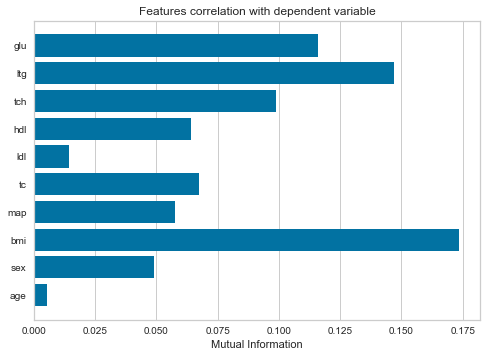

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Mutual Information'>

In [51]:
#mutual information with dependent variable (target)
#this looks a lot like the potential feature importance after models are built----------
visualizer = FeatureCorrelation(method='mutual_info-regression', labels=predictor_names)
visualizer.fit(diabete_data.data, diabete_data.target, discrete_features=discrete_predictors, random_state=30)
visualizer.show()

In [ ]:
##########Part 2: linear regression models in scikit-learn
###########################################

In [52]:
##build Ridge, Lasso and Elastic Nets regression models as well as random forest regression models
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [53]:
##split 80% of the data into training set
X_train, X_test, y_train, y_test = train_test_split(diabete_data.data, diabete_data.target, test_size=0.20, random_state=80)
print(X_train.shape); print(X_test.shape)

(353, 10)
(89, 10)


In [54]:
##ridge regression
ridge_reg = Ridge(alpha=0.01)
ridge_reg.fit(X_train, y_train) 
pred_train_ridge= ridge_reg.predict(X_train)

print(np.sqrt(mean_squared_error(y_train,pred_train_ridge)))
print(r2_score(y_train, pred_train_ridge))

pred_test_ridge= ridge_reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_ridge))) 
print(r2_score(y_test, pred_test_ridge))

53.58114762652628
0.5180291492916929
53.58187104349913
0.49861941189498893


In [55]:
##lasso regression
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train) 
pred_train_lasso= lasso_reg.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= lasso_reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

53.54895448144554
0.5186081401093399
53.56580118986283
0.49892010704792356


In [57]:
##elastic net regression
enet_reg = ElasticNet(alpha = 0.01)
enet_reg.fit(X_train, y_train) 
pred_train_enet= enet_reg.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= enet_reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

60.65036861053874
0.38246206676987327
60.3301361447468
0.36437586896832896


In [ ]:
##summary for the three regression methods above and you can see that elastic net actually did the worst aong the three and
##the other two performed similarly

/Users/hbi16859/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


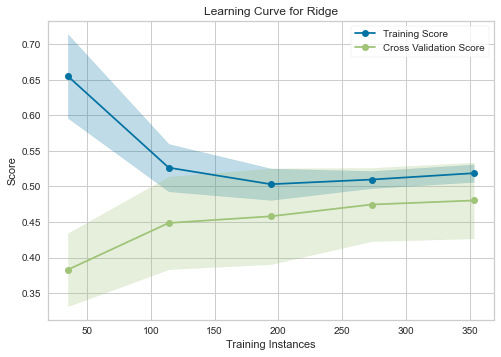

<AxesSubplot:title={'center':'Learning Curve for Ridge'}, xlabel='Training Instances', ylabel='Score'>

In [62]:
#Use the learning curve in yellowbrick to evaluate the model performance above
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve
cv = StratifiedKFold(n_splits=5)
sizes = np.linspace(0.2, 1.0, 10)

visualizer_ridge = LearningCurve(
    ridge_reg, cv=cv, scoring='r2')

visualizer_ridge.fit(diabete_data.data,diabete_data.target)        # Fit the data to the visualizer
visualizer_ridge.show()           # Finalize and render the figure

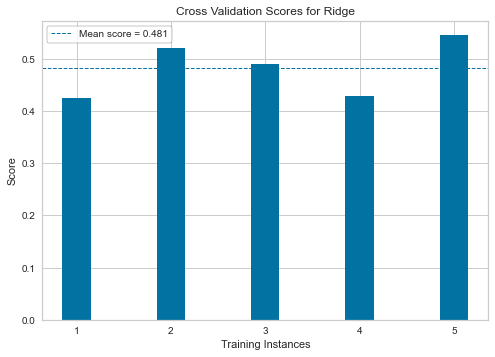

In [70]:
#cross validation using Kfold
from sklearn.model_selection import KFold
from yellowbrick.model_selection import cv_scores


# Instantiate the regression model and visualizer
cv_kf = KFold(n_splits=5)
visualizer = cv_scores(ridge_reg, diabete_data.data, diabete_data.target, cv=cv_kf, scoring='r2')

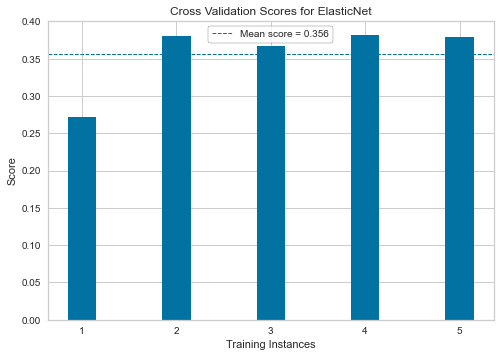

In [71]:
#for elastic net
cv_kf = KFold(n_splits=5)
visualizer = cv_scores(enet_reg, diabete_data.data, diabete_data.target, cv=cv_kf, scoring='r2')

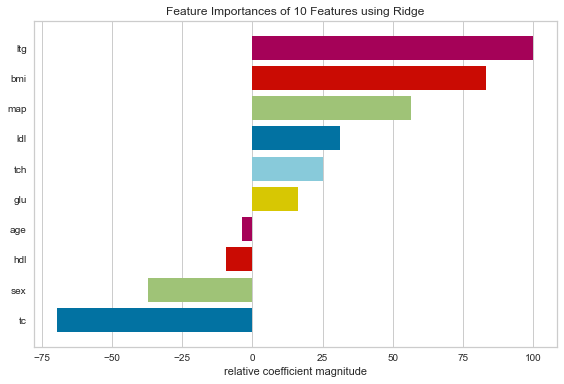

<AxesSubplot:title={'center':'Feature Importances of 10 Features using Ridge'}, xlabel='relative coefficient magnitude'>

In [67]:
##check the feature importance 
from yellowbrick.model_selection import FeatureImportances

##check the feature importance of the models
viz_feature = FeatureImportances(ridge_reg,labels=predictor_names)
viz_feature.fit(diabete_data.data, diabete_data.target)
viz_feature.show()

In [68]:
#help(viz_feature)

In [ ]:
#the results are very interesting; I will probably do a literature reviews on the factors and then
#resort to bayesian inference to see whether I could build a better model in the end

In [73]:
####hyperparameter tuning
##given the models above, ridge and lasso seem to perform similarly
#let's focus on lasso and try to find the best alpha value to use
#pip3 install Scikit-Optimize

In [91]:
np.linspace(0.005,1,100)

array([0.005     , 0.01505051, 0.02510101, 0.03515152, 0.04520202,
       0.05525253, 0.06530303, 0.07535354, 0.08540404, 0.09545455,
       0.10550505, 0.11555556, 0.12560606, 0.13565657, 0.14570707,
       0.15575758, 0.16580808, 0.17585859, 0.18590909, 0.1959596 ,
       0.2060101 , 0.21606061, 0.22611111, 0.23616162, 0.24621212,
       0.25626263, 0.26631313, 0.27636364, 0.28641414, 0.29646465,
       0.30651515, 0.31656566, 0.32661616, 0.33666667, 0.34671717,
       0.35676768, 0.36681818, 0.37686869, 0.38691919, 0.3969697 ,
       0.4070202 , 0.41707071, 0.42712121, 0.43717172, 0.44722222,
       0.45727273, 0.46732323, 0.47737374, 0.48742424, 0.49747475,
       0.50752525, 0.51757576, 0.52762626, 0.53767677, 0.54772727,
       0.55777778, 0.56782828, 0.57787879, 0.58792929, 0.5979798 ,
       0.6080303 , 0.61808081, 0.62813131, 0.63818182, 0.64823232,
       0.65828283, 0.66833333, 0.67838384, 0.68843434, 0.69848485,
       0.70853535, 0.71858586, 0.72863636, 0.73868687, 0.74873

In [109]:
# from skopt import BayesSearchCV
# from sklearn.model_selection import RepeatedStratifiedKFold
# #define hyperparameter search space
# params = dict()
# params['alpha'] = np.linspace(0.005,1,100)
# #params['alpha'] = Real(1e-2, 1e+1, prior='log-uniform')

# # define cross-validation evaluation
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# # define the search
# search = BayesSearchCV(estimator=lasso_reg, search_spaces=params, n_jobs=-1, cv=cv)
# # perform the search
# search.fit(diabete_data.data, diabete_data.target)

# #print out the results
# # report the best result
# print(search.best_score_)
# print(search.best_params_)
# ##this code should be fine, but it has some version issues causing the error message:
# ##__init__() got an unexpected keyword argument 'iid'

In [105]:
##just use the plain GridSearch and RandomizedSearch from scikit-learn itself
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
params = dict()
params['alpha'] = np.linspace(0.005,1,100)

# define the search
search = GridSearchCV(estimator=lasso_reg, param_grid=params, n_jobs=-1, cv=cv)
#search = RandRandomizedSearchCV(estimator=lasso_reg, param_distributions=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(diabete_data.data, diabete_data.target)

#print out the results
# report the best result
print(search.best_score_)
print(search.best_params_)
##I tried both gridsearch and randomizedsearch:
##(1) each time, I run the gridsearch, it is giving me the same answers
##(2) while it is giving me different answers when I run the randomized search
#The regressor.best_score_ is the average of r2 scores on left-out test folds for the best parameter combination, 
#which seems to be lower or on par with the model deined using alpha of 0.01

/Users/hbi16859/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/hbi16859/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/hbi16859/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.494083150163221
{'alpha': 0.0452020202020202}


In [107]:
##just use the plain GridSearch and RandomizedSearch from scikit-learn itself
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
params = dict()
params['alpha'] = np.linspace(0.005,1,100)

# define the search
search = GridSearchCV(estimator=enet_reg, param_grid=params, n_jobs=-1, cv=cv)
#search = RandRandomizedSearchCV(estimator=lasso_reg, param_distributions=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(diabete_data.data, diabete_data.target)

#print out the results
# report the best result
print(search.best_score_)
print(search.best_params_)
##I tried both gridsearch and randomizedsearch:
##(1) each time, I run the gridsearch, it is giving me the same answers
##(2) while it is giving me different answers when I run the randomized search
#The regressor.best_score_ is the average of r2 scores on left-out test folds for the best parameter combination, 
#which seems to be better than the model deined using alpha of 0.01
##still not as good as the lass or ridge regression model

/Users/hbi16859/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/hbi16859/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/hbi16859/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.4313282068343806
{'alpha': 0.005}


In [ ]:
##########Part 3: multiple layer neural networks in keras
##define two layers
###########################################

In [110]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [175]:
model = keras.Sequential()
model.add(keras.Input(shape=(10,)))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(1, activation="relu"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 3)                 33        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 4         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [176]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mse',
    metrics=['accuracy',tf.keras.metrics.RootMeanSquaredError()])
    #loss='mean_absolute_error')

##different regression metrics

In [177]:
tf.keras.metrics.RootMeanSquaredError

tensorflow.python.keras.metrics.RootMeanSquaredError

In [178]:
%%time
nn_history = model.fit(
    X_train, y_train,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 5.71 s, sys: 347 ms, total: 6.06 s
Wall time: 5.45 s


In [179]:
nn_history.history.keys()

dict_keys(['loss', 'accuracy', 'root_mean_squared_error', 'val_loss', 'val_accuracy', 'val_root_mean_squared_error'])

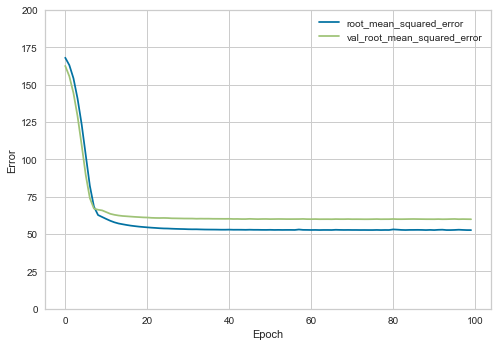

In [181]:
import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['root_mean_squared_error'], label='root_mean_squared_error')
  plt.plot(history.history['val_root_mean_squared_error'], label='val_root_mean_squared_error')
  plt.ylim([0, 200])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
plot_loss(nn_history)

In [ ]:
##from the RMSE value here, you can see this two layer neural networks perform similarly with the regression models that we tried
##neural networks is a good general approach but there is no guarantee that it will work than simpler ML models like regression

In [183]:
eval_results=model.evaluate(X_test, y_test, verbose=1)

3/3 [==============================] - 0s 2ms/step - loss: 2855.5859 - accuracy: 0.0000e+00 - root_mean_squared_error: 53.4377


In [184]:
eval_results #loss, accuracy, rmse

[2855.5859375, 0.0, 53.43768310546875]

In [ ]:
##########Part 4: autoML
###########################################

In [ ]:
##let's try autoML frameworks to see whether there are better models out there

In [ ]:
#as is probably expected for open source softwares, the dependencies are oftentimes very complicated,
##turns out, installing dependencies for tpot and auto-sklearn all run into issues

In [ ]:
###part 4.1 try tpot
#pip3 install deap update_checker tqdm stopit xgboost

In [ ]:
###part 4.2 try auto-sklearn
#curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip3 install
#pip3 install auto-sklearn

In [ ]:
##part 4.3 try auto-keras
#this installation actually worked:
#python3 -m pip install git+https://github.com/keras-team/keras-tuner.git
#python3 -m pip install autokeras

In [189]:
import autokeras as ak
# tries 10 different models using the max_trials variable
reg_ak = ak.StructuredDataRegressor(max_trials=10, overwrite=True,metrics=[tf.keras.metrics.RootMeanSquaredError()])
reg_ak.fit(X_train, y_train, epochs=10)

Trial 10 Complete [00h 00m 02s]
val_loss: 3461.976806640625

Best val_loss So Far: 3407.775634765625
Total elapsed time: 00h 00m 28s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
12/12 [==============================] - 0s 2ms/step - loss: 27326.7216 - root_mean_squared_error: 151.6094
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 24178.8738 - root_mean_squared_error: 155.4804
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 18397.7219 - root_mean_squared_error: 135.6032
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 10519.9712 - root_mean_squared_error: 102.4716
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 4865.8893 - root_mean_squared_error: 69.6757
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 4396.6033 - root_mean_squared_error: 66.2933
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 3834.6998 - root_mean_squared_error: 61.9028
Ep

In [190]:
# Predict with the best model.
predicted_ak = reg_ak.predict(X_test)
# Evaluate the best model with testing data.
reg_ak.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 3872.9573 - root_mean_squared_error: 62.2331


[3872.957275390625, 62.233089447021484]

In [191]:
##if you look at the results of auto-keras for RMSE, it is higher than the previous hand-picked models
##It is cool that the model construction aspect was automated, but the performance is not ideal (it is not
##generating the best models out there)

In [194]:
#####Part 5, explainable AI 
####there are quite a few XAI tools, here I am going to explore two of them: SHAP and LIME
####################

In [197]:
#####part 5.1 use SHAP

In [198]:
lasso_reg

Lasso(alpha=0.01)

In [206]:
predictor_names

['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']

In [205]:
lasso_reg.coef_  ##coefficient for the 10 predictors in the model

array([ -17.30148848, -217.99528758,  499.34189015,  334.45541027,
       -501.22846504,  253.24433122,  -12.86660396,  157.80886693,
        636.9767487 ,   90.16662898])

In [209]:
type(X_train)

numpy.ndarray

In [210]:
# explain the model's predictions using SHAP
# use the lass regression model for example
#follow the official documentation (not the one in github)
import shap
#explainer = shap.LinearExplainer(lasso_reg,X_train)
explainer = shap.Explainer(lasso_reg,X_train)  #X_train is provided as the 
#convert X_train to a df to asssign column names
df_x_train=pd.DataFrame(X_train)
df_x_train.columns=predictor_names
shap_values = explainer(df_x_train)


In [ ]:
#first, local interpretation with individual instances

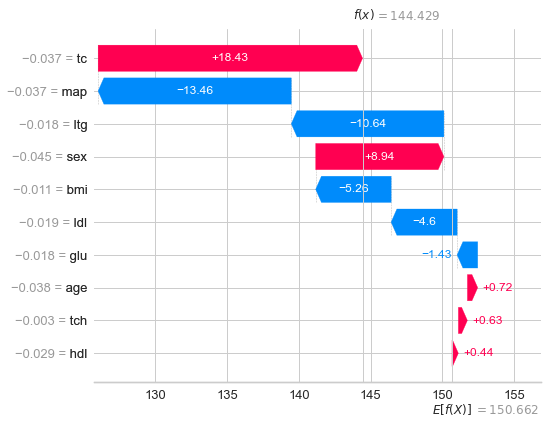

In [212]:
# visualize the first instance's explanation
shap.plots.waterfall(shap_values[0])

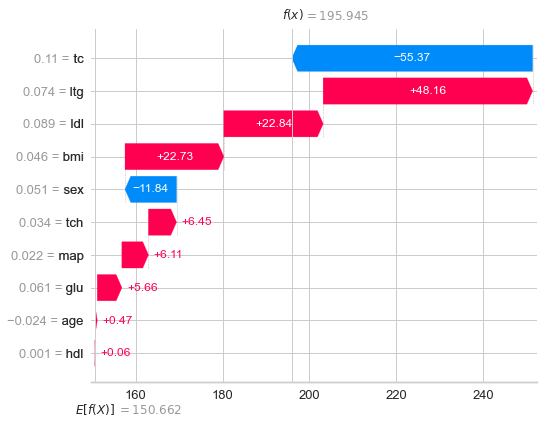

In [214]:
##let's try another example
shap.plots.waterfall(shap_values[100])

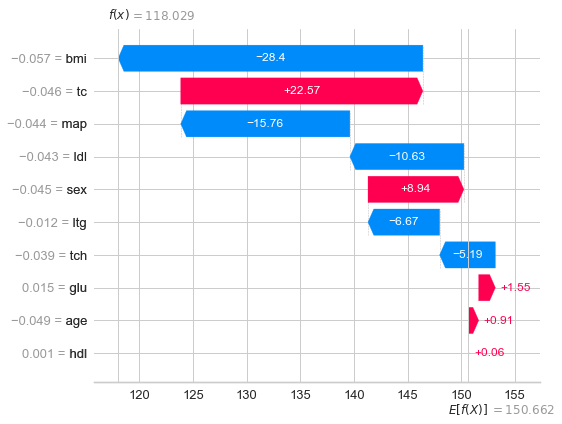

In [215]:
##let's try yet another example
shap.plots.waterfall(shap_values[300])

In [ ]:
#secondly, global interpretation to understand feature importance, relationshiop

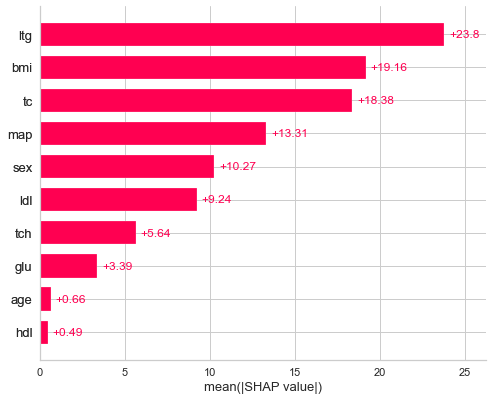

In [216]:
shap.plots.bar(shap_values)  ##the mean explanation; it gives you the idea about global feature importance,but maybe missleading 
  ##in other interpretations (for example, the tc's direction in the individual instances above)

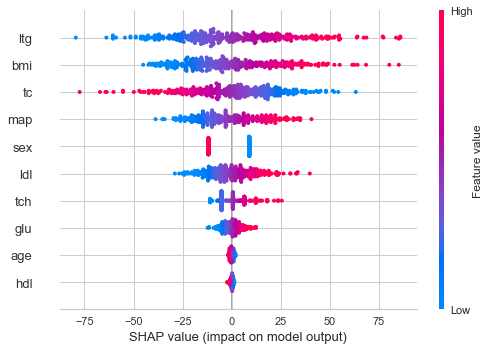

In [217]:
shap.plots.beeswarm(shap_values) #I think this is very informative
#it shows that bmi,map,itg,idl,tch,glu have the impact in one direction and tc and hdl in the other direction
#of course, this could also be reflected by the coefficients in the regression models

#this also makes sense with our current understanding of the diabetes etiology and physiology/pathology

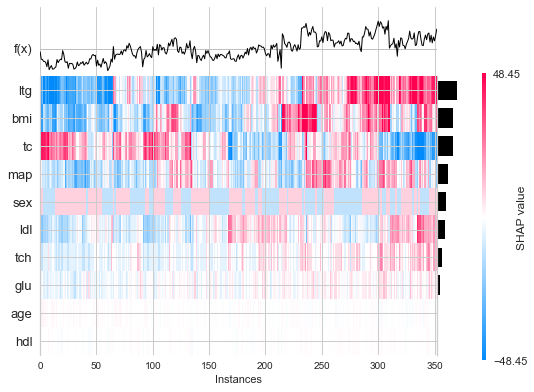

In [220]:
shap.plots.heatmap(shap_values[:4000]) #heatmap to show the global pattern

In [ ]:
#reference for SHAP:
#https://shap.readthedocs.io/en/latest/index.html

In [224]:
discrete_predictors

[False, True, False, False, False, False, False, False, False, False]

In [226]:
#####part 5.1 use LIME
import lime
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=predictor_names, class_names=y_train, categorical_features=discrete_predictors, verbose=True, mode='regression')

In [228]:
X_test[1]

array([-0.04547248, -0.04464164,  0.01535029, -0.07452802, -0.04972731,
       -0.01728445, -0.02867429, -0.00259226, -0.10436482, -0.07563562])

In [229]:
#explain an instance
lime_exp = lime_explainer.explain_instance(X_test[1], lasso_reg.predict, num_features=10)

Intercept 151.90565577112727
Prediction_local [119.74562262]
Right: 91.40175067886767


In [232]:
lime_exp.show_in_notebook(show_table=True) ##the figure is not showing up as expected

In [ ]:
##reference for LIME:
#https://github.com/marcotcr/lime

In [ ]:
##summary for explainable AI: SHAP is very powerful, user-friendly and with great documentations compared to LIME!